<a href="https://colab.research.google.com/github/sriharsha1718/Predictive-Maintenance-System-for-Industrial-Equipment/blob/main/Equipment_Maintainenace_and_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import types
import pandas as pd

def __iter__(self): return 0

In [5]:
pd_data_1 = pd.read_csv('/content/drive/MyDrive/MachinePM/equipment_failure_data_1.csv', sep=",", header=0)
pd_data_2 = pd.read_csv('/content/drive/MyDrive/MachinePM/equipment_failure_data_2.csv', sep=",", header=0)

In [6]:
pd_data=pd.concat([pd_data_1, pd_data_2])

In [7]:
pd_data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [8]:
pd_data.shape

(307751, 16)

In [9]:
#To count no of machines in the dataset
machines = pd.DataFrame(pd_data.groupby(['ID']).agg(['count']))
machines.shape

(421, 15)

In [10]:
#To count Unique dates in the dataset
dates = pd.DataFrame(pd_data.groupby(['DATE']).agg(['count']))
dates.shape

(731, 15)

In [11]:
#Removing all the duplicates
df_failure_thingy=pd_data
df_failure_thingy=df_failure_thingy.drop_duplicates(subset=['ID','DATE'])
df_failure_thingy.shape

(307751, 16)

In [12]:
#Checking Null values
pd_data.isnull().sum(axis = 0)

ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

In [13]:
t = pd.DataFrame(pd_data.groupby(['EQUIPMENT_FAILURE'])['ID'].agg('count'))
t

,ID
EQUIPMENT_FAILURE,
0,307330
1,421


In [14]:
pd_data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000
mean,100310.826603,4.543943,14.585192,80.265541,35.018249,4675.848252,7.972097,9.069123,137.963064,0.001368,144.665715,2524.192399
std,177.574390,2.284121,8.817056,85.804273,14.446585,2521.074632,2.321949,16.898887,238.890128,0.036961,240.773926,3158.930976
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100161.000000,3.000000,7.694100,0.000000,28.200000,3209.000000,6.621500,0.900000,11.798276,0.000000,9.250000,721.000000
50%,100311.000000,5.000000,11.661600,31.680000,34.940000,4237.047619,8.004000,4.200000,38.200000,0.000000,53.080000,1113.000000
75%,100467.000000,6.000000,22.560000,160.080000,41.610000,5743.000000,9.460000,10.600000,150.900000,0.000000,165.092608,2784.000000
max,100617.000000,8.000000,59.040000,2555.520000,592.890000,52767.000000,24.600000,511.000000,4151.700000,1.000000,2068.110000,15170.000000


In [15]:
#Corelation of Dependent and Independent variable
cor=pd_data.corr( method='pearson')

cor=cor[['EQUIPMENT_FAILURE']]
cor['ABS_EQUIPMENT_FAILURE']=abs(cor['EQUIPMENT_FAILURE'])
cor=cor.sort_values(by=['ABS_EQUIPMENT_FAILURE'], ascending=[False])

In [16]:
cor

,EQUIPMENT_FAILURE,ABS_EQUIPMENT_FAILURE
EQUIPMENT_FAILURE,1.000000e+00,1.000000e+00
S15,-6.036352e-02,6.036352e-02
S17,-3.429070e-02,3.429070e-02
S18,9.765002e-03,9.765002e-03
S13,-8.617761e-03,8.617761e-03
S5,-7.189979e-03,7.189979e-03
S8,6.517148e-03,6.517148e-03
S16,-6.138895e-03,6.138895e-03
S19,-6.087474e-03,6.087474e-03
AGE_OF_EQUIPMENT,4.733368e-04,4.733368e-04


In [17]:
#Converting character type date column into date
pd_data['DATE'] = pd.to_datetime(pd_data['DATE'])

In [18]:
#Creating new column flipper
pd_data=pd_data.sort_values(by=['ID','DATE'], ascending=[True, True])

pd_data['flipper'] = np.where((pd_data.ID != pd_data.ID.shift(1)), 1, 0)
pd_data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0


In [19]:
#define your feature window by which we will aggregate our sensor values.
feature_window=21
dfx=pd_data

In [20]:
#Selecting the first record of each machine
starter=dfx[dfx['flipper'] == 1]
starter=starter[['DATE','ID']]

In [21]:
#renaming date to start_date
starter=starter.rename(index=str, columns={"DATE": "START_DATE"})

In [22]:
#converting START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])

In [23]:
#Merging START_DATE to the original data set
dfx=dfx.sort_values(by=['ID', 'DATE'], ascending=[True, True])
starter=starter.sort_values(by=['ID'], ascending=[True])
dfx =dfx.merge(starter, on=['ID'], how='left')

In [24]:
# calculating the number of days since the beginning of each well.
dfx['C'] = dfx['DATE'] - dfx['START_DATE']
dfx['TIME_SINCE_START'] = dfx['C'] / np.timedelta64(1, 'D')
dfx=dfx.drop(columns=['C'])
dfx['too_soon'] = np.where((dfx.TIME_SINCE_START < feature_window) , 1, 0)

In [25]:
dfx['S5_mean'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S5)
dfx['S5_median'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).median()) , dfx.S5)
dfx['S5_max'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).max()) , dfx.S5)
dfx['S5_min'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).min()) , dfx.S5)


dfx['S13_mean'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S13)
dfx['S13_median'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).median()) , dfx.S13)
dfx['S13_max'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).max()) , dfx.S13)
dfx['S13_min'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).min()) , dfx.S13)


dfx['S15_mean'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S15)
dfx['S15_median'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).median()) , dfx.S15)
dfx['S15_max'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).max()) , dfx.S15)
dfx['S15_min'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).min()) , dfx.S15)

dfx['S16_mean'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S16)
dfx['S16_median'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).median()) , dfx.S16)
dfx['S16_max'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).max()) , dfx.S16)
dfx['S16_min'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).min()) , dfx.S16)


dfx['S17_mean'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S17)
dfx['S17_median'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).median()) , dfx.S17)
dfx['S17_max'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).max()) , dfx.S17)
dfx['S17_min'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).min()) , dfx.S17)

dfx['S18_mean'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S18)
dfx['S18_median'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).median()) , dfx.S18)
dfx['S18_max'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).max()) , dfx.S18)
dfx['S18_min'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).min()) , dfx.S18)



dfx['S19_mean'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S19)
dfx['S19_median'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).median()) , dfx.S19)
dfx['S19_max'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).max()) , dfx.S19)
dfx['S19_min'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).min()) , dfx.S19)


dfx.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,...,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,...,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.9,1.9,1.9,1.9
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,...,187.573214,187.573214,24.671429,24.671429,24.671429,24.671429,1.9,1.9,1.9,1.9
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,...,148.363704,148.363704,24.733333,24.733333,24.733333,24.733333,2.0,2.0,2.0,2.0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,...,133.660000,133.660000,24.773077,24.773077,24.773077,24.773077,2.0,2.0,2.0,2.0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,...,197.181600,197.181600,24.808000,24.808000,24.808000,24.808000,1.5,1.5,1.5,1.5


In [26]:
dfx['S5_chg'] = np.where((dfx.S5_mean == 0),0 , dfx.S5/dfx.S5_mean)


dfx['S13_chg'] = np.where((dfx.S13_mean == 0),0 , dfx.S13/dfx.S13_mean)

dfx['S15_chg'] = np.where((dfx.S15_mean==0),0 , dfx.S15/dfx.S15_mean)
dfx['S16_chg'] = np.where((dfx.S16_mean == 0),0 , dfx.S16/dfx.S16_mean)
dfx['S17_chg'] = np.where((dfx.S17_mean == 0),0 , dfx.S17/dfx.S17_mean)
dfx['S18_chg'] = np.where((dfx.S18_mean == 0),0 , dfx.S18/dfx.S18_mean)
dfx['S19_chg'] = np.where((dfx.S19_mean == 0),0 , dfx.S19/dfx.S19_mean)

In [27]:
#copying the data set to the original name
pd_data=dfx

In [28]:
#Creating a new window
target_window=28

In [29]:
#Sorting the data and reset the index.
pd_data=pd_data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
pd_data.reset_index(level=0, inplace=True)

In [30]:
#new data frame that contains the failure records. Rename DATE to FAILURE_DATE
df_failure_thingy=pd_data[pd_data['EQUIPMENT_FAILURE'] == 1]

df_failure_thingy=df_failure_thingy[['DATE','ID']]

df_failure_thingy=df_failure_thingy.rename(index=str, columns={"DATE": "FAILURE_DATE"})

pd_data=pd_data.sort_values(by=['ID'], ascending=[True])
df_failure_thingy=df_failure_thingy.sort_values(by=['ID'], ascending=[True])

In [31]:
#Appending the FAILURE_DATE to each ID.
pd_data =pd_data.merge(df_failure_thingy, on=['ID'], how='left')

In [32]:
#For each record, calculate the number of days until failure.
pd_data=pd_data.sort_values(by=['ID','DATE'], ascending=[True, True])

pd_data['FAILURE_DATE'] = pd.to_datetime(pd_data['FAILURE_DATE'])
pd_data['DATE'] = pd.to_datetime(pd_data['DATE'])
pd_data['C'] = pd_data['FAILURE_DATE'] - pd_data['DATE']

pd_data['TIME_TO_FAILURE'] = pd_data['C'] / np.timedelta64(1, 'D')

In [33]:
#Cleaning up and sorting the records by ID and DATE
pd_data=pd_data.drop(columns=['index'])

In [34]:
pd_data=pd_data.sort_values(by=['ID', 'DATE'], ascending=[True, True])

In [35]:
pd_data.reset_index(inplace=True)

In [36]:
pd_data.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,...,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE
0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,143 days,143.0
1,549,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,142 days,142.0
2,483,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,141 days,141.0
3,484,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,140 days,140.0
4,485,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,139 days,139.0


In [37]:
#Creating new variable, FAILURE_TARGET. It is equal to 1 if the record proceeds a failure by "failure_window" days or less.
pd_data['FAILURE_TARGET'] = np.where(((pd_data.TIME_TO_FAILURE < target_window) & ((pd_data.TIME_TO_FAILURE>=0))), 1, 0)

pd_data.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,...,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE,FAILURE_TARGET
0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,143 days,143.0,0
1,549,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,142 days,142.0,0
2,483,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,141 days,141.0,0
3,484,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,140 days,140.0,0
4,485,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,139 days,139.0,0


In [38]:
tips_summed = pd_data.groupby(['FAILURE_TARGET'])['S5'].count()
tips_summed

FAILURE_TARGET
0    296011
1     11740
Name: S5, dtype: int64

In [39]:
pd_data['FAILURE_TARGET'].mean()

0.03814772332177637

In [40]:
#Get a Unique List of All IDs
aa=pd_data
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(421, 1)

In [41]:
np.random.seed(42)
pd_id['wookie'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000
pd_id=pd_id[['ID', 'wookie']]

In [42]:
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.35)), 'TRAINING', np.where(((pd_id.wookie <= 0.65)), 'VALIDATION', 'TESTING'))


In [43]:
#no of machines fall in each group.
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       149
TRAINING      146
VALIDATION    126
Name: wookie, dtype: int64

In [44]:
#Appending the Group of each id to each individual record.
pd_data=pd_data.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])

In [45]:
pd_data =pd_data.merge(pd_id, on=['ID'], how='inner')
pd_data.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,...,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE,FAILURE_TARGET,wookie,MODELING_GROUP
0,0,100001,2014-12-02,G,O,Y,1,11.088,145.223448,39.34,...,1.000000,1.0,1.000000,1.000000,2015-04-24,143 days,143.0,0,0.727,TESTING
1,1,100001,2016-03-29,G,O,Y,1,18.960,0.000000,38.87,...,1.080334,0.0,0.909801,0.613483,2015-04-24,-340 days,-340.0,0,0.727,TESTING
2,2,100001,2016-03-30,G,O,Y,1,29.040,0.000000,37.36,...,1.093691,0.0,0.906040,0.677419,2015-04-24,-341 days,-341.0,0,0.727,TESTING
3,3,100001,2016-03-31,G,O,Y,1,18.000,0.000000,38.81,...,0.910905,0.0,0.919466,0.695035,2015-04-24,-342 days,-342.0,0,0.727,TESTING
4,4,100001,2016-04-01,G,O,Y,1,26.160,0.000000,39.47,...,1.160104,0.0,0.932363,0.690141,2015-04-24,-343 days,-343.0,0,0.727,TESTING


In [46]:
#no of records are in each group.
tips_summed = pd_data.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       108919
TRAINING      106726
VALIDATION     92106
Name: wookie, dtype: int64

In [47]:
#no of failure targets are in each group.
tips_summed = pd_data.groupby(['MODELING_GROUP'])['FAILURE_TARGET'].sum()
tips_summed

MODELING_GROUP
TESTING       4151
TRAINING      4071
VALIDATION    3518
Name: FAILURE_TARGET, dtype: int64

In [48]:
#Creating a separate data frame for the training data and using this data set to build the model.
df_training=pd_data[pd_data['MODELING_GROUP'] == 'TRAINING']
df_training=df_training.drop(columns=['MODELING_GROUP','C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_training.shape

(106726, 56)

In [49]:
df_train_test=pd_data[pd_data['MODELING_GROUP'] != 'VALIDATION']

df_train_test=df_train_test.drop(columns=['wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_train_test.shape

(215645, 58)

In [50]:
df_total=pd_data.drop(columns=['C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_total.shape

(307751, 57)

In [51]:
#Defining the Training features and Target.
training_features=df_training[['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','S13','S5',
 'S16','S19','S18','S8','S5_mean','S5_median','S5_max','S5_min','S13_mean','S13_median','S13_max','S13_min','S15_mean','S15_median',
 'S15_max','S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min','S19_mean','S19_median','S19_max','S19_min',
 'S5_chg','S13_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']]

In [52]:
training_target=df_training[['FAILURE_TARGET']]

In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])

In [54]:
x_res, y_res = smx.fit_resample(training_features, training_target.values.ravel())

In [55]:
df_x=pd.DataFrame(x_res)

df_x.columns = [
 'REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','S13','S5','S16','S19',
 'S18','S8','S5_mean','S5_median','S5_max','S5_min','S13_mean','S13_median','S13_max','S13_min','S15_mean','S15_median','S15_max',
 'S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min',
 'S19_mean','S19_median','S19_max','S19_min','S5_chg','S13_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']
df_x.head()

,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S15,S17,S13,S5,S16,...,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg
0,D,L,R,6,1308,15.5184,188.10,36.29,4318.0,8.0073,...,22.4,28.9,22.4,0.989654,0.989779,1.208706,0.913224,1.150727,0.995684,0.911805
1,D,L,R,6,1307,10.3032,149.24,36.78,4377.0,7.0766,...,22.4,28.9,22.4,1.001165,1.001141,0.800762,0.799231,0.931453,0.991996,0.911805
2,D,L,R,6,1306,11.4480,187.45,35.84,4265.0,8.0259,...,22.4,28.9,22.4,0.974444,0.974443,0.886546,0.906484,1.158515,0.985806,0.911805
3,D,L,R,6,1302,15.1368,148.33,37.53,4466.0,8.7163,...,22.4,28.9,22.4,1.015319,1.015344,1.168344,0.992329,0.922866,0.973863,0.911805
4,D,L,R,6,1304,14.3736,179.30,36.31,4321.0,7.9396,...,22.4,28.9,22.4,0.983099,0.983085,1.094500,0.902220,1.132530,0.980886,0.911805


In [56]:
#Format the Dependent Variable.
df_y=pd.DataFrame(y_res)
df_y.columns = ['FAILURE_TARGET']

In [57]:
df_y.mean(axis = 0)

FAILURE_TARGET    0.5
dtype: float64

In [58]:
df_balanced = pd.concat([df_y, df_x], axis=1)
df_balanced.head()

,FAILURE_TARGET,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S15,S17,S13,S5,...,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg
0,0,D,L,R,6,1308,15.5184,188.10,36.29,4318.0,...,22.4,28.9,22.4,0.989654,0.989779,1.208706,0.913224,1.150727,0.995684,0.911805
1,0,D,L,R,6,1307,10.3032,149.24,36.78,4377.0,...,22.4,28.9,22.4,1.001165,1.001141,0.800762,0.799231,0.931453,0.991996,0.911805
2,0,D,L,R,6,1306,11.4480,187.45,35.84,4265.0,...,22.4,28.9,22.4,0.974444,0.974443,0.886546,0.906484,1.158515,0.985806,0.911805
3,0,D,L,R,6,1302,15.1368,148.33,37.53,4466.0,...,22.4,28.9,22.4,1.015319,1.015344,1.168344,0.992329,0.922866,0.973863,0.911805
4,0,D,L,R,6,1304,14.3736,179.30,36.31,4321.0,...,22.4,28.9,22.4,0.983099,0.983085,1.094500,0.902220,1.132530,0.980886,0.911805


In [59]:
#Converting the categorical variables into binary dummy variables.
#the XGBT model (below) doesn't like categorical fields.
df_dv = pd.get_dummies(df_balanced['REGION_CLUSTER'])

df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})


df_balanced= pd.concat([df_balanced, df_dv], axis=1)


df_dv = pd.get_dummies(df_balanced['MAINTENANCE_VENDOR'])

df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})


df_balanced = pd.concat([df_balanced, df_dv], axis=1)



df_dv = pd.get_dummies(df_balanced['MANUFACTURER'])

df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})


df_balanced = pd.concat([df_balanced, df_dv], axis=1)


df_dv = pd.get_dummies(df_balanced['WELL_GROUP'])

df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})


df_balanced = pd.concat([df_balanced, df_dv], axis=1)

In [60]:
#Executing the same transformation on the train_test data set.
df_dv = pd.get_dummies(df_train_test['REGION_CLUSTER'])

df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})


df_train_test= pd.concat([df_train_test, df_dv], axis=1)


df_dv = pd.get_dummies(df_train_test['MAINTENANCE_VENDOR'])

df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})


df_train_test = pd.concat([df_train_test, df_dv], axis=1)



df_dv = pd.get_dummies(df_train_test['MANUFACTURER'])

df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})


df_train_test = pd.concat([df_train_test, df_dv], axis=1)


df_dv = pd.get_dummies(df_train_test['WELL_GROUP'])

df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})


df_train_test = pd.concat([df_train_test, df_dv], axis=1)

In [61]:
#on the df_total data set.
df_dv = pd.get_dummies(df_total['REGION_CLUSTER'])

df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})


df_total= pd.concat([df_total, df_dv], axis=1)


df_dv = pd.get_dummies(df_total['MAINTENANCE_VENDOR'])

df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})


df_total = pd.concat([df_total, df_dv], axis=1)



df_dv = pd.get_dummies(df_total['MANUFACTURER'])

df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})


df_total = pd.concat([df_total, df_dv], axis=1)


df_dv = pd.get_dummies(df_total['WELL_GROUP'])

df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})


df_total = pd.concat([df_total, df_dv], axis=1)

In [62]:
# Remove the newly redundant categorical variables.  This are now represented by dummy variables.
df_balanced=df_balanced.drop(columns=['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP'])

In [63]:
features = [x for x in df_balanced.columns if x not in ['FAILURE_TARGET']]
dependent=pd.DataFrame(df_balanced['FAILURE_TARGET'])

independent=df_balanced.drop(columns=['FAILURE_TARGET'])

In [64]:
#model specs.
df_balanced.head(1)

,FAILURE_TARGET,AGE_OF_EQUIPMENT,S15,S17,S13,S5,S16,S19,S18,S8,...,MN_Y,MN_Z,WG_1,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8
0,0,1308,15.5184,188.1,36.29,4318.0,8.0073,22.4,143.9,222.64,...,0,0,0,0,0,0,0,1,0,0


In [65]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1):


    #Fit the algorithm on the data
    alg.fit(train[predictors], target['FAILURE_TARGET'], eval_metric='error')

    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    plt.ylabel('Feature Importance Score')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['FAILURE_TARGET'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['FAILURE_TARGET'], dtrain_predprob))

In [66]:
#Defining the parameter values for a xgbt model
estimator_vals=160
lr_vals = 0.8
md_vals = 12
mcw_vals = 0.5
gamma_vals =.1
subsample_vals = .5
c_bt_vals = 1
reg_lambda_vals = 1
reg_alpha_vals = 1

In [67]:
#defining the model
xgb0 = XGBClassifier(objective = 'binary:logistic',use_label_encoder=False,learning_rate = lr_vals,
n_estimators=estimator_vals,max_depth=md_vals,min_child_weight=mcw_vals,
gamma=gamma_vals,subsample=subsample_vals,colsample_bytree=c_bt_vals,
reg_lambda=reg_lambda_vals,reg_alpha=reg_alpha_vals);


Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


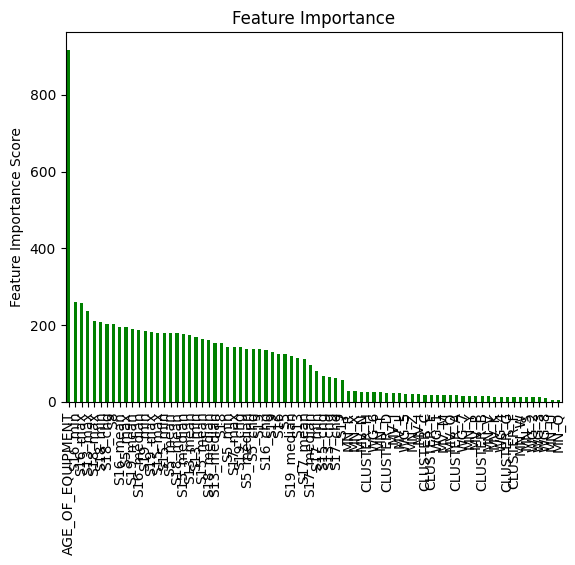

In [68]:
#Building the model
evaluate_model(xgb0, independent, dependent,features)

In [69]:
#Evaluate the model using an AUC and accuacy metrics.
df_testing=df_train_test[df_train_test['MODELING_GROUP'] == 'TESTING'].copy()
df_training=df_train_test[df_train_test['MODELING_GROUP'] != 'TESTING'].copy()

In [70]:
df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['FAILURE_TARGET'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['FAILURE_TARGET'], df_training['P_FAIL']))

Accuracy : 1
AUC Score (Train): 1.000000


In [71]:
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['FAILURE_TARGET'].values, df_testing['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_testing['FAILURE_TARGET'], df_testing['P_FAIL']))

Accuracy : 0.9543
AUC Score (Train): 0.518169


In [72]:
#Evaluating the model using a simple confusion matrix.
print(pd.crosstab(df_testing.Y_FAIL, df_testing.EQUIPMENT_FAILURE, dropna=False))

EQUIPMENT_FAILURE       0    1
Y_FAIL                        
0                  107851  147
1                     919    2


In [73]:
print(pd.crosstab(df_testing.Y_FAIL, df_testing.FAILURE_TARGET, dropna=False))

FAILURE_TARGET       0     1
Y_FAIL                      
0               103894  4104
1                  874    47


In [74]:
forecast_window=90
cutoff=0.50

In [75]:
df=df_train_test

In [76]:
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)

In [77]:
sort_df=df
sort_df=sort_df.sort_values(by=['ID','DATE'], ascending=[True, True])

In [78]:
aa=sort_df
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(295, 1)

In [79]:
#Labeling each machine with a sequential number.
# id to be sequential for use in a later step.
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()

,SCOOBYDOO,ID
0,1,100001
1,2,100002
2,3,100014
3,4,100017
4,5,100018


In [80]:
#the max number of machines.
column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value

296

In [81]:
sort_df=sort_df.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
sort_df =sort_df.merge(pd_id, on=['ID'], how='inner')
sort_df.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,...,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,P_FAIL,Y_FAIL,SCOOBYDOO
0,0,100001,2014-12-02,G,O,Y,1,11.088,145.223448,39.34,...,0,0,0,0,0,0,0,0.000008,0,1
1,1,100001,2016-03-29,G,O,Y,1,18.960,0.000000,38.87,...,0,0,0,0,0,0,0,0.009255,0,1
2,2,100001,2016-03-30,G,O,Y,1,29.040,0.000000,37.36,...,0,0,0,0,0,0,0,0.018464,0,1
3,3,100001,2016-03-31,G,O,Y,1,18.000,0.000000,38.81,...,0,0,0,0,0,0,0,0.002859,0,1
4,4,100001,2016-04-01,G,O,Y,1,26.160,0.000000,39.47,...,0,0,0,0,0,0,0,0.000043,0,1


In [82]:
sort_df=sort_df.sort_values(by=['ID','DATE'], ascending=[True,True])

#reset index
sort_df=sort_df.reset_index(drop=True)

In [83]:
#create a null dataframe for the next step
df_fred=sort_df
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape



#sum the number of signals occuring over the last 90 days for each machine individually

for x in range(max_value):
        dffx=sort_df[sort_df['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])

xx=df_fred

# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)


df=xx

In [84]:
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])

In [85]:
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()

In [86]:
df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})

In [87]:
df_signal_date.shape

(254, 3)

In [88]:
#Append ID_OF_SIGNAL and SIGNAL_DATE to the original Dataframe base on the SIGNAL_ID.
xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')
df=xx.copy()

In [89]:
#Simplify by only keeping the fields we need.
df=df[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]

In [90]:
#Creating a field called "Warning" that indicates the time from signal to failure.
df['C'] = df['FAILURE_DATE'] - df['SIGNAL_DATE'].copy()
df['WARNING'] = df['C'] / np.timedelta64(1, 'D').copy()
df.head()

,DATE,ID,EQUIPMENT_FAILURE,FAILURE_TARGET,FAILURE_DATE,P_FAIL,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL,MODELING_GROUP,C,WARNING
0,2014-12-02,100001,0,0,2015-04-24,8.063382e-06,0,0,NaT,NaN,TESTING,NaT,NaN
1,2014-12-03,100001,0,0,2015-04-24,4.159480e-07,0,0,NaT,NaN,TESTING,NaT,NaN
2,2014-12-04,100001,0,0,2015-04-24,1.069239e-06,0,0,NaT,NaN,TESTING,NaT,NaN
3,2014-12-05,100001,0,0,2015-04-24,2.323576e-04,0,0,NaT,NaN,TESTING,NaT,NaN
4,2014-12-06,100001,0,0,2015-04-24,1.314291e-04,0,0,NaT,NaN,TESTING,NaT,NaN


In [91]:
#Create a realistic confusion matrix.
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)

In [92]:
# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)

In [93]:
# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window | df.WARNING.isnull().values.any()), 1, 0)
#note that the

df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==xx.ID)), 1, 0)

In [94]:
df['bootie']=1

In [95]:
df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))

In [96]:
pd.options.display.max_rows = 1000
dd=df[df['ID']==100002]
dd.head(1000)

,DATE,ID,EQUIPMENT_FAILURE,FAILURE_TARGET,FAILURE_DATE,P_FAIL,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL,MODELING_GROUP,C,WARNING,TRUE_POSITIVE,FALSE_NEGATIVE,BAD_S,FALSE_POSITIVE,bootie,CATEGORY
731,2014-12-02,100002,0,0,2015-10-27,8.506872e-07,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
732,2014-12-03,100002,0,0,2015-10-27,4.324851e-06,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
733,2014-12-04,100002,0,0,2015-10-27,1.452135e-05,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
734,2014-12-05,100002,0,0,2015-10-27,8.481632e-08,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
735,2014-12-06,100002,0,0,2015-10-27,3.355664e-06,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
736,2014-12-07,100002,0,0,2015-10-27,8.266486e-06,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
737,2014-12-08,100002,0,0,2015-10-27,6.318846e-06,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
738,2014-12-09,100002,0,0,2015-10-27,2.697588e-06,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
739,2014-12-10,100002,0,0,2015-10-27,3.209951e-08,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE
740,2014-12-11,100002,0,0,2015-10-27,3.084916e-06,0,2,2016-10-08,100001.0,TRAINING,-347 days,-347.0,0,0,1,0,1,TRUE_NEGATIVE


In [97]:
table = pd.pivot_table(df, values=['bootie'], index=['MODELING_GROUP'],columns=['CATEGORY'], aggfunc=np.sum)
table

bootie                                           
CATEGORY       FALSE_NEGATIVE FALSE_POSITIVE TRUE_NEGATIVE TRUE_POSITIVE
MODELING_GROUP                                                          
TESTING                 135.0           94.0      108676.0          14.0
TRAINING                  NaN            NaN      106580.0         146.0

In [98]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://cdn-images-1.medium.com/max/1600/1*fUKUEUeqgIYU9xlxj4pwhw.png")

In [99]:
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500

In [100]:
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)
table

,TOTAL_COST
MODELING_GROUP,
TESTING,4296000
TRAINING,1095000


In [101]:
#Calculating the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})
wells

,WELLS
MODELING_GROUP,
TESTING,149
TRAINING,146


In [102]:
tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)

In [103]:
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')

In [104]:
ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,4296000,149,28832.214765,-884.214765
TRAINING,1095000,146,7500.000000,20448.000000


In [105]:
#Fine-Tuning the solution.
forecast_window=90
cutoff=0.02

In [106]:
df=df_train_test

In [107]:
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)
#sort the data by id and date.
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])
#create a unique list of machines
aa=xx

pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]


#label each machine with a sequential number
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()

#grab the max number of machines +1

column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value

#append sequential number to main file.  Now each machine has a sequencial id.
xx=xx.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
xx =xx.merge(pd_id, on=['ID'], how='inner')
xx.head()

#sort data
xx=xx.sort_values(by=['ID','DATE'], ascending=[True,True])

#reset index
xx=xx.reset_index(drop=True)

#create a null dataframe for the next step
df_fred=xx
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape


#sum the number of signals occuring over the last 90 days for each machine individually

for x in range(max_value):
        dffx=xx[xx['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])


xx=df_fred

# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)


#sort the data by id and date.

xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])


#create signal id with the cumsum function.
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()


df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})



xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')


xx=xx[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]



xx['C'] = xx['FAILURE_DATE'] - xx['SIGNAL_DATE']
xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')




df=xx

In [108]:
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)


# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)

# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window), 1, 0)

df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)

df['bootie']=1

df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))

In [109]:
#examining a cross-tabulation.
table = pd.pivot_table(df, values=['bootie'], index=['MODELING_GROUP'],columns=['CATEGORY'], aggfunc=np.sum)
table

bootie                                           
CATEGORY       FALSE_NEGATIVE FALSE_POSITIVE TRUE_NEGATIVE TRUE_POSITIVE
MODELING_GROUP                                                          
TESTING                    99            276        108494            50
TRAINING                    8             48        106532           138

In [110]:
#Now we can calculate the total cost.
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500
#Aggregate the costs by modeling group.
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)

#Calculate the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})

tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
#Merge the total costs and total machines into one data frame.
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')
#Calculate the average cost per machine.

ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,3759000,149,25228.187919,2719.812081
TRAINING,1347000,146,9226.027397,18721.972603


In [111]:
#Validating the solution.
df=df_total

In [112]:
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)
#sort the data by id and date.
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])
#create a unique list of machines
aa=xx

pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]


#label each machine with a sequential number
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()

#grab the max number of machines +1

column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value

#append sequential number to main file.  Now each machine has a sequencial id.
xx=xx.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
xx =xx.merge(pd_id, on=['ID'], how='inner')
xx.head()

#sort data
xx=xx.sort_values(by=['ID','DATE'], ascending=[True,True])

#reset index
xx=xx.reset_index(drop=True)

#create a null dataframe for the next step
df_fred=xx
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape


#sum the number of signals occuring over the last 90 days for each machine individually

for x in range(max_value):
        dffx=xx[xx['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])


xx=df_fred

# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)


#sort the data by id and date.

xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])


#create signal id with the cumsum function.
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()


df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})



xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')


xx=xx[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]



xx['C'] = xx['FAILURE_DATE'] - xx['SIGNAL_DATE']
xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')




df=xx






# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)


# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)

# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window), 1, 0)

df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)

df['bootie']=1

df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))




#Now we can calculate the total cost.
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500
#Aggregate the costs by modeling group.
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)

#Calculate the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})

tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
#Merge the total costs and total machines into one data frame.
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')
#Calculate the average cost per machine.

ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,3759000,149,25228.187919,2719.812081
TRAINING,1347000,146,9226.027397,18721.972603
VALIDATION,3064500,126,24321.428571,3626.571429
